In [16]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

## Load Preprocessed Data

In [17]:
df = pd.read_csv("../Data/final_dataset.csv")
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_1,title_2,...,thumbnail_link_3,thumbnail_link_4,thumbnail_link_5,thumbnail_link_6,thumbnail_link_7,thumbnail_link_8,thumbnail_link_9,thumbnail_link_10,thumbnail_link_11,country
0,10,17158579,787425,43420,125882,0,0,0,755.0,652.0,...,8,3,4,6,9,0.0,0.0,0.0,0.0,0
1,23,1014651,127794,1688,13030,0,0,0,6028.0,223.0,...,8,3,4,6,9,0.0,0.0,0.0,0.0,0
2,23,3191434,146035,5339,8181,0,0,0,733.0,1744.0,...,8,3,4,6,9,0.0,0.0,0.0,0.0,0
3,24,2095828,132239,1989,17518,0,0,0,52.0,2139.0,...,8,3,4,6,9,0.0,0.0,0.0,0.0,0
4,10,33523622,1634130,21082,85067,0,0,0,541.0,653.0,...,8,3,4,6,9,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120741,10,25066952,268088,12783,9933,0,0,0,739.0,740.0,...,6,2,4,3986,7,8.0,0.0,0.0,0.0,2
120742,10,1492219,61998,13781,24330,0,0,0,1871.0,1872.0,...,6,2,4,4243,7,8.0,0.0,0.0,0.0,2
120743,10,29641412,394830,8892,19988,0,0,0,652.0,709.0,...,6,2,4,3907,3908,7.0,8.0,0.0,0.0,2
120744,24,14317515,151870,45875,26766,0,0,0,1867.0,1868.0,...,6,2,4,4242,7,8.0,0.0,0.0,0.0,2


## Forecast Views

### Grid Search for best Hyperparameters

In [79]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['views','likes','dislikes','comment_count'], axis=1), df['views'], test_size=0.2, random_state=42)

# Define DT Instance
regressor = DecisionTreeRegressor()

# Define Parameters for Grid Search
params =  {
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Define Grid Search Instance
grid = GridSearchCV(estimator=regressor,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

# Fit the model
grid.fit(X_train, y_train)

# Assess the score
grid.best_score_, grid.best_params_ # - > 0.34073138881746784, {'max_depth': 9, 'min_samples_leaf': 1}

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.8s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.5s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.5s
[CV] END ....................max_depth=1, min_

(0.34073138881746784, {'max_depth': 9, 'min_samples_leaf': 1})

### Forecast vies with basic Tranfer

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['views','likes','dislikes','comment_count'], axis=1), df['views'], test_size=0.2, random_state=42)

# Train decision tree regressor with best parameters
regressor = DecisionTreeRegressor()#max_depth = 9, min_samples_leaf = 1)
regressor.fit(X_train, y_train)

# Prediction
y_pred = regressor.predict(X_test)

# Evaluate the model
rmse = np.sqrt ( mean_squared_error(y_test, y_pred) )
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 4921118.282030336


### Visualize Results

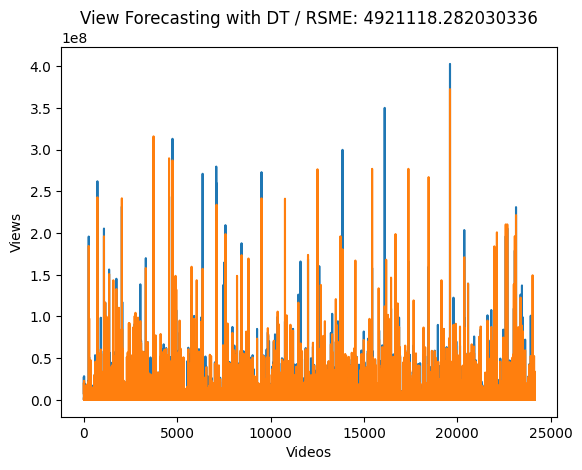

In [6]:
plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pred)
plt.title('View Forecasting with DT / RSME: '+ str(rmse))
plt.xlabel('Videos')
plt.ylabel('Views')
plt.show()

# Forecast views without transfer

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_selected = df[df['country'] == 2]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(['views','likes','dislikes','comment_count'], axis=1), df_selected['views'], test_size=0.2, random_state=42)

# Train decision tree regressor with best parameters
regressor = DecisionTreeRegressor()#max_depth = 9, min_samples_leaf = 1)
regressor.fit(X_train, y_train)

# Prediction
y_pred = regressor.predict(X_test)

# Evaluate the model
rmse = np.sqrt ( mean_squared_error(y_test, y_pred) )
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6461923.8830859875


### Visualize Results

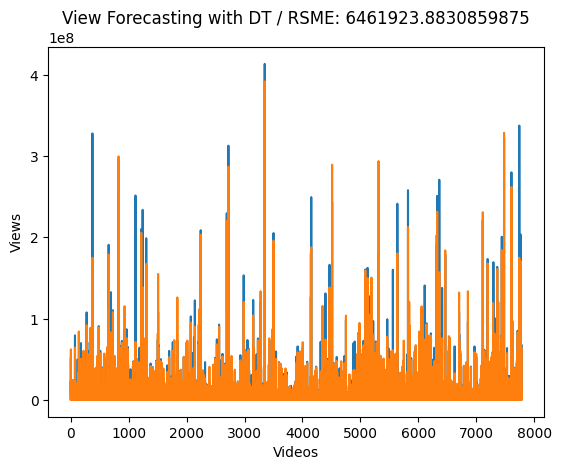

In [25]:
plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pred)
plt.title('View Forecasting with DT / RSME: '+ str(rmse))
plt.xlabel('Videos')
plt.ylabel('Views')
plt.show()

### Analize Feature Importance

In [26]:
# Create a DataFrame with Feature Importances
feature_importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.transpose()
importance_df.columns = importance_df.iloc[0]
importance_df = importance_df.drop('Feature')

# Sum encoded columns
column_list = ['tags_\d+','channel_title_\d+','description_\d+','title_\d+']

for i in column_list:

    filter_columns = importance_df.filter(regex=i)

    # Replace encoded columns with aggregated column
    importance_df = importance_df.drop(filter_columns, axis=1)
    importance_df[i[:-4]] = filter_columns.sum(axis=1)

# Clean importance_df for visualization
importance_df = importance_df.transpose()
importance_df = importance_df.reset_index()
importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df

,Feature,Importance
32,description,0.627821
30,tags,0.102324
11,trending_date_3,0.082922
10,trending_date_2,0.072827
4,video_id_1,0.061975
33,title,0.021142
31,channel_title,0.013162
0,category_id,0.007014
15,publish_time_4,0.004313
23,thumbnail_link_6,0.002521


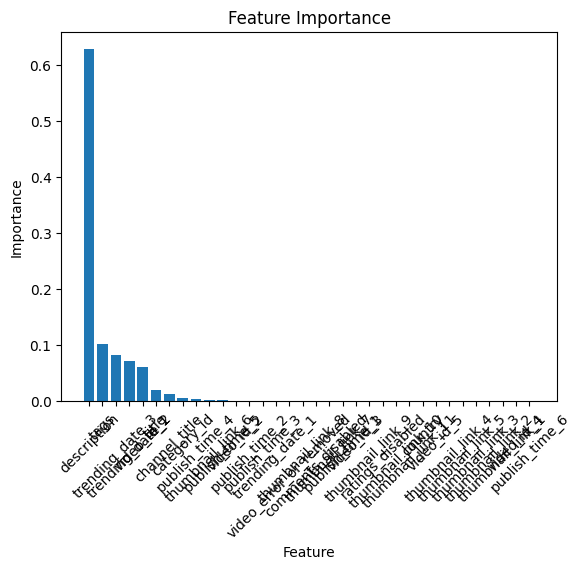

In [27]:
# Create a bar plot of feature importances
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Backtesting

In [ ]:
import pandas as pd

# Load historical price data into a DataFrame
price_data = pd.read_csv('price_data.csv')  # Replace with your historical price data file

# Define the trading strategy
def my_strategy(data):
    # Calculate moving average
    data['SMA'] = data['Close'].rolling(window=10).mean()

    # Generate trading signals
    data['Signal'] = 0
    data.loc[data['Close'] > data['SMA'], 'Signal'] = 1
    data.loc[data['Close'] < data['SMA'], 'Signal'] = -1

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change()

    # Calculate strategy returns
    data['Strategy_Return'] = data['Signal'].shift() * data['Return']

    # Calculate cumulative returns
    data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

    return data

# Apply the strategy
backtest_results = my_strategy(price_data)

# Print the backtest results
print(backtest_results)


## Forecast Likes

### Grid Search for best Hyperparameters

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(['views','likes','dislikes','comment_count'], axis=1), df_selected['likes'], test_size=0.2, random_state=42)

# Define DT Instance
regressor = DecisionTreeRegressor()

# Define Parameters for Grid Search
params =  {
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Define Grid Search Instance
grid = GridSearchCV(estimator=regressor,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

# Fit the model
grid.fit(X_train, y_train)

# Assess the score
grid.best_score_, grid.best_params_ # - > 0.41760199301939005, {'max_depth': 10, 'min_samples_leaf': 1}

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.8s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.4s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=1, min_

(0.7864188836188941, {'max_depth': 10, 'min_samples_leaf': 1})

In [ ]:
grid.

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(pipe_grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

### Forecast

In [89]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['views','likes','dislikes','comment_count'], axis=1), df['likes'], test_size=0.2, random_state=42)

# Train a decision tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
rmse = np.sqrt ( mean_squared_error(y_test, y_pred) )
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 54465.13232615048


### Visualize Results

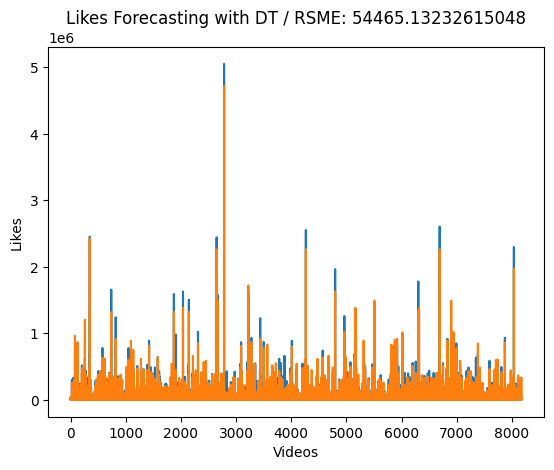

In [90]:
plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pred)
plt.title('Likes Forecasting with DT / RSME: '+ str(rmse))
plt.xlabel('Videos')
plt.ylabel('Likes')
plt.show()

### Analize Feature Importance

In [73]:
# Create a DataFrame with Feature Importances
feature_importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.transpose()
importance_df.columns = importance_df.iloc[0]
importance_df = importance_df.drop('Feature')

# Sum encoded columns
column_list = ['tags_\d+','channel_title_\d+','description_\d+','title_\d+']

for i in column_list:

    # Replace encoded columns with aggregated column
    filter_columns = importance_df.filter(regex=i)
    importance_df = importance_df.drop(filter_columns, axis=1)
    importance_df[i[:-4]] = filter_columns.sum(axis=1)

# Clean importance_df for visualization
importance_df = importance_df.transpose()
importance_df = importance_df.reset_index()
importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df

,Feature,Importance
6,description,0.627572
4,tags,0.182543
7,title,0.080186
0,category_id,0.078497
5,channel_title,0.031036
1,comments_disabled,0.000166
2,ratings_disabled,0.000001
3,video_error_or_removed,0.0


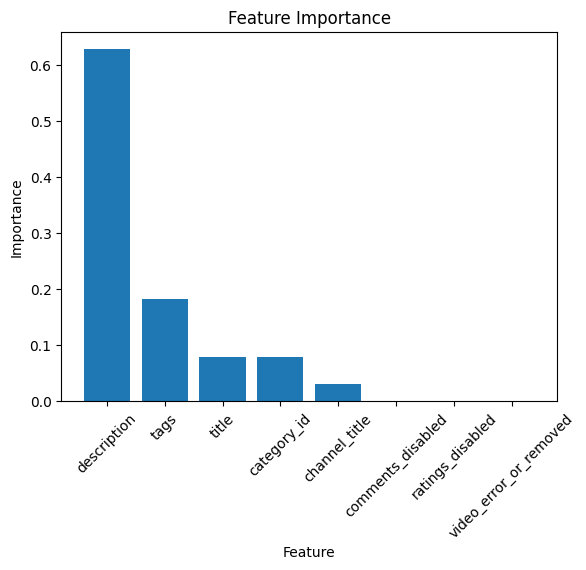

In [74]:
# Create a bar plot of feature importances
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()